# Airbnb Data

## Importing Libraries

In [40]:
#importing the required libraries

import numpy as np
import pandas as pd

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style
import plotly.express as px

## Loading Data into Pandas DataFrame

In [41]:
import pandas as pd

# Create a DataFrame from the JSON data
df = pd.read_csv(r"listings.csv")

# Display the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,108061,Rental unit in Asheville · ★4.51 · 1 bedroom ·...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2022-12-11,0.64,2,319,2,NaN
1,155305,Guesthouse in Asheville · ★4.59 · 1 bedroom · ...,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,101,1,389,2023-06-11,2.69,7,342,30,NaN
2,156805,Home in Asheville · ★4.52 · 1 bedroom · 1 bed ...,746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.47,7,0,0,NaN
3,156926,Hostel in Asheville · ★4.69 · 1 bedroom · 6 be...,746673,BonPaul,NaN,28806,35.57864,-82.59578,Shared room,28,1,327,2023-06-05,2.28,7,365,19,NaN
4,197263,Home in Asheville · ★4.96 · 1 bedroom · 1 bed ...,961396,Timo,NaN,28806,35.57808,-82.63689,Private room,45,2,68,2023-05-28,0.51,2,82,15,NaN


## Finding Missing Values

In [42]:
missing_values = df.isnull().sum()

# Print the count of missing values

print("Missing Values:")

print(missing_values)

# Calculate the missing value ratio

missing_ratio = df.isnull().mean()

# Print the missing value ratio

print("Missing Value Ratio:")

print(missing_ratio)

Missing Values:
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               3239
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        249
reviews_per_month                  249
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3239
dtype: int64
Missing Value Ratio:
id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               1.000000
neighbourhood                    

## Data Cleaning

In [43]:
# Drop specific columns from the DataFrame
columns_to_drop = ['neighbourhood_group', 'license']
df = df.drop(columns=columns_to_drop)

df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)

# Dropping Raws which have null values
# Did this step because the rest columns with missing values are the review related text and replacement of the text will not be accurate.
df = df.dropna()

#remove duplicates
df = df.drop_duplicates()

In [44]:
# Calculate the missing value ratio

missing_ratio = df.isnull().mean()

# Print the missing value ratio

print("Missing Value Ratio:")

print(missing_ratio)

Missing Value Ratio:
id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64


## Converting Datatype

In [45]:
# Convert the 'last_review' column to datetime type
df['last_review'] = pd.to_datetime(df['last_review'])

## Data Exploration

In [46]:
import pandas as pd

#examine the structure of the data
print("Data Structure:")
print(df.info())
print("-------")
print("\n")

print("Data Variables:")
print(df.columns)
print("-------")
print("\n")

Data Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2990 entries, 0 to 3216
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2990 non-null   int64         
 1   name                            2990 non-null   object        
 2   host_id                         2990 non-null   int64         
 3   host_name                       2990 non-null   object        
 4   neighbourhood                   2990 non-null   int64         
 5   latitude                        2990 non-null   float64       
 6   longitude                       2990 non-null   float64       
 7   room_type                       2990 non-null   object        
 8   price                           2990 non-null   int64         
 9   minimum_nights                  2990 non-null   int64         
 10  number_of_reviews               2990 non-null   int64   

## Descriptive Statistics

In [47]:
print("\n Data Distributions:")

print(df.describe())
print("\n Data Objects:")
print(df.describe(include=['object']))

# Plotting the mean, median and mode
mean = df.describe().loc['mean']
meadian = df.describe().loc['50%']
std = df.describe().loc['std']

print("\nMean:")
print(mean)
print("\nMedian:")
print(meadian)
print("\nStandard Deviation:")
print(std)


 Data Distributions:
                 id       host_id  neighbourhood     latitude    longitude  \
count  2.990000e+03  2.990000e+03    2990.000000  2990.000000  2990.000000   
mean   1.799870e+17  1.420192e+08   28792.436789    35.575941   -82.558182   
std    3.129743e+17  1.408386e+08      30.643154     0.049181     0.048192   
min    1.080610e+05  4.134000e+03   28704.000000    35.422810   -82.691050   
25%    2.440421e+07  2.507441e+07   28801.000000    35.559943   -82.593051   
50%    4.332564e+07  9.630012e+07   28804.000000    35.587090   -82.557385   
75%    5.513837e+17  2.055225e+08   28806.000000    35.605767   -82.520815   
max    9.079704e+17  5.150519e+08   28806.000000    35.656090   -82.459420   

             price  minimum_nights  number_of_reviews  reviews_per_month  \
count  2990.000000     2990.000000        2990.000000        2990.000000   
mean    175.561538        4.689298         104.891639           2.569973   
std     143.177045       10.049698         131.

## Handling Outliers

In [101]:
import pandas as pd

import numpy as np

from scipy.stats import mstats

columns = ['neighbourhood','minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
    'number_of_reviews_ltm']  

# Replace outliers with a threshold value (e.g., 3 standard deviations)

threshold = 3

for column in columns:
    
    data=df[column]
    
    median = np.median(data)

    mad = np.median(np.abs(data - median))
    
    # Calculate modified Z-scores

    #The value 0.6745 is a constant factor used in the modified Z-score calculation. It is derived from the inverse of the cumulative distribution function (CDF) of the standard normal distribution at a specific percentile.

    modified_z_scores = 0.6745 * (data - median) / mad

    # Find outliers

    outliers = np.where(np.abs(modified_z_scores) > threshold)
    # Print the indices of outliers
    #print("Indices of Outliers:", outliers)
        
# Apply winsorization
columns_with_outliers = ['neighbourhood','minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']  

for column in columns_with_outliers:
    data=df[column]
    winsorized_data = mstats.winsorize(data, limits=[0.10, 0.10])
    data = winsorized_data.astype(float)
    df[column] = data


In [49]:
# Printing head of Final clean dataset
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,108061,Rental unit in Asheville · ★4.51 · 1 bedroom ·...,320564,Lisa,28801.0,35.60670,-82.55563,Entire home/apt,100,7.0,92.0,2022-12-11,0.64,2.0,319.0,2.0
1,155305,Guesthouse in Asheville · ★4.59 · 1 bedroom · ...,746673,BonPaul,28806.0,35.57864,-82.59578,Entire home/apt,101,1.0,274.0,2023-06-11,2.69,7.0,342.0,30.0
2,156805,Home in Asheville · ★4.52 · 1 bedroom · 1 bed ...,746673,BonPaul,28806.0,35.57864,-82.59578,Private room,66,1.0,67.0,2020-01-01,0.47,7.0,17.0,1.0
3,156926,Hostel in Asheville · ★4.69 · 1 bedroom · 6 be...,746673,BonPaul,28806.0,35.57864,-82.59578,Shared room,28,1.0,274.0,2023-06-05,2.28,7.0,347.0,19.0
4,197263,Home in Asheville · ★4.96 · 1 bedroom · 1 bed ...,961396,Timo,28806.0,35.57808,-82.63689,Private room,45,2.0,68.0,2023-05-28,0.51,2.0,82.0,15.0


# Data Visualization

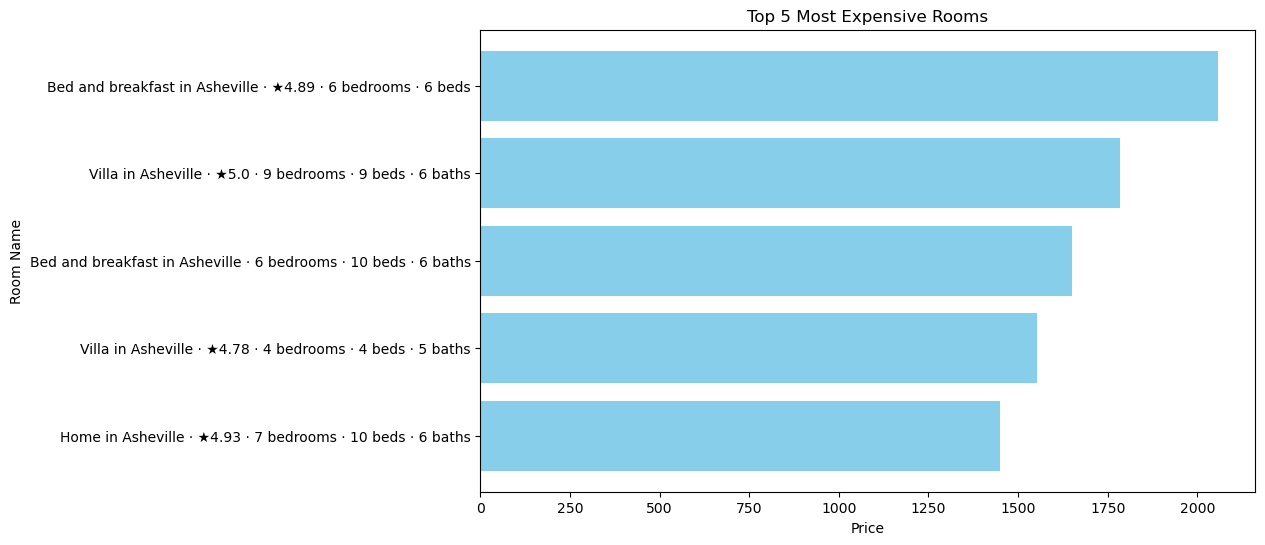

In [50]:
# Sort the DataFrame by 'price' in descending order
df_sorted = df.sort_values(by='price', ascending=False)

# Get the top 5 most expensive rooms
top_5_expensive = df_sorted.head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_expensive['name'], top_5_expensive['price'], color='skyblue')
plt.xlabel('Price')
plt.ylabel('Room Name')
plt.title('Top 5 Most Expensive Rooms')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most expensive room on top
plt.show()

This graph reveals the most expensive room types with their facilities, types and locations

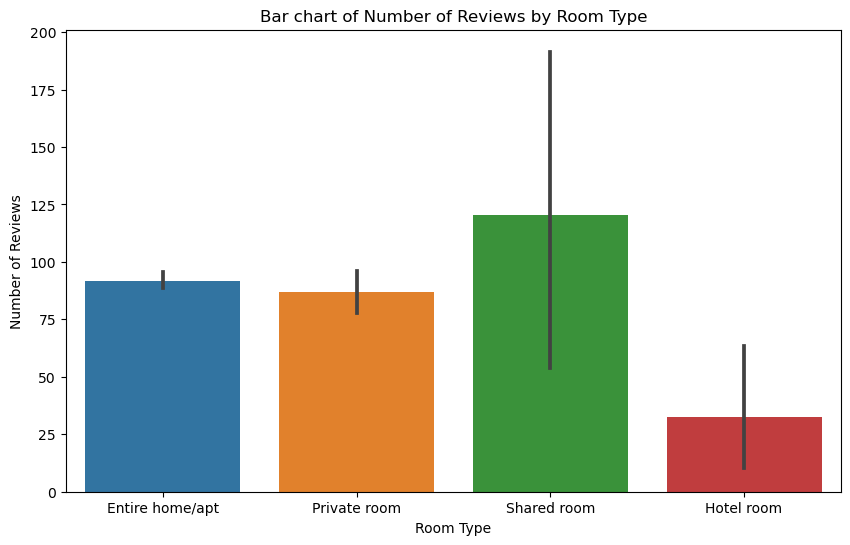

In [51]:
# Visual 2: Bar chart using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='number_of_reviews', data=df)
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.title('Bar chart of Number of Reviews by Room Type')
plt.show()

The above visual gives the knowledge on number of reviews on the different room types of Airbnb

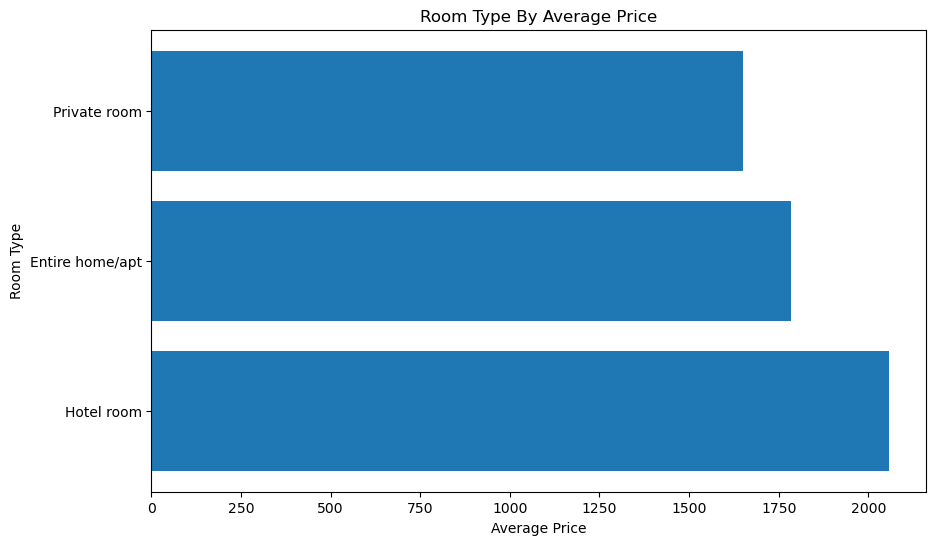

In [52]:
# Get the top 5 most expensive room types
top_5_expensive = df.nlargest(5, 'price')

# Visual 6: Horizontal bar chart using Matplotlib for top 5 most expensive room types
plt.figure(figsize=(10, 6))
plt.barh(top_5_expensive['room_type'], top_5_expensive['price'])
plt.xlabel('Average Price')
plt.ylabel('Room Type')
plt.title('Room Type By Average Price')
plt.show()

The insight gain from the above graph is that Hotel room cost the highest!!!

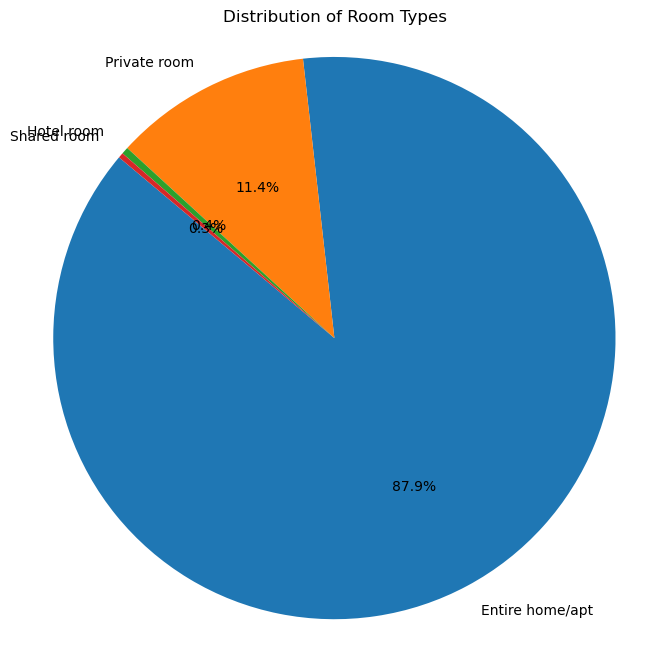

In [53]:
# Count the number of occurrences of each room type
room_type_counts = df['room_type'].value_counts()


# Visual 6: Pie chart using Matplotlib to show the distribution of room types
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Feature Engineering

In [76]:
df['room_type']=pd.factorize(df['room_type'])[0]
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,108061,Rental unit in Asheville · ★4.51 · 1 bedroom ·...,320564,Lisa,28801.0,35.60670,-82.55563,0,100,7.0,92.0,2022-12-11,0.64,2.0,319.0,2.0
1,155305,Guesthouse in Asheville · ★4.59 · 1 bedroom · ...,746673,BonPaul,28806.0,35.57864,-82.59578,0,101,1.0,274.0,2023-06-11,2.69,7.0,342.0,30.0
2,156805,Home in Asheville · ★4.52 · 1 bedroom · 1 bed ...,746673,BonPaul,28806.0,35.57864,-82.59578,1,66,1.0,67.0,2020-01-01,0.47,7.0,17.0,1.0
3,156926,Hostel in Asheville · ★4.69 · 1 bedroom · 6 be...,746673,BonPaul,28806.0,35.57864,-82.59578,2,28,1.0,274.0,2023-06-05,2.28,7.0,347.0,19.0
4,197263,Home in Asheville · ★4.96 · 1 bedroom · 1 bed ...,961396,Timo,28806.0,35.57808,-82.63689,1,45,2.0,68.0,2023-05-28,0.51,2.0,82.0,15.0


## Correlation Matrix for Dimesionality Reduction

In [55]:
# Looking at the correlation matrix for the maximum correlated variables with the price variable 

correlation_matrix = df.corr().round(2)
print(correlation_matrix)

                                  id  host_id  neighbourhood  latitude  \
id                              1.00     0.34          -0.07     -0.07   
host_id                         0.34     1.00          -0.11     -0.12   
neighbourhood                  -0.07    -0.11           1.00      0.74   
latitude                       -0.07    -0.12           0.74      1.00   
longitude                      -0.01    -0.04          -0.05     -0.17   
room_type                      -0.09    -0.06           0.04      0.03   
price                           0.05     0.08           0.01      0.03   
minimum_nights                 -0.07    -0.11           0.07      0.05   
number_of_reviews              -0.46    -0.27           0.10      0.08   
reviews_per_month              -0.03    -0.01           0.05      0.02   
calculated_host_listings_count  0.08     0.14          -0.02      0.01   
availability_365                0.15     0.19          -0.07     -0.06   
number_of_reviews_ltm          -0.18  

## ML Model

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

In [84]:
#Train Test split Model
# selected features based on the correlation matrix
x = df[['room_type','minimum_nights','number_of_reviews','reviews_per_month','availability_365','calculated_host_listings_count']] # Independet variable
y = df['price'] # dependent variable

In [85]:
# Looking at Min and Max

print(x.min())
print(x.max())

room_type                          0.00
minimum_nights                     1.00
number_of_reviews                  4.00
reviews_per_month                  0.34
availability_365                  17.00
calculated_host_listings_count     1.00
dtype: float64
room_type                           3.00
minimum_nights                      7.00
number_of_reviews                 274.00
reviews_per_month                   5.46
availability_365                  347.00
calculated_host_listings_count     15.00
dtype: float64


In [86]:
# Applying Normalization on the data for more easier convergence

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [87]:
X.head()

,0,1,2,3,4,5
0,0.000000,1.000000,0.325926,0.058594,0.915152,0.071429
1,0.000000,0.000000,1.000000,0.458984,0.984848,0.428571
2,0.333333,0.000000,0.233333,0.025391,0.000000,0.428571
3,0.666667,0.000000,1.000000,0.378906,1.000000,0.428571
4,0.333333,0.166667,0.237037,0.033203,0.196970,0.071429


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### Linear Regression

In [103]:
lm = LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression()

In [104]:
y_pred = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 16180.221601419173
Mean Absolute Error (MAE): 79.3835146361443


### Decision Tree

In [105]:
classifier = DecisionTreeClassifier(random_state = 1234)
dt = classifier.fit(X_train, y_train)
dt.score(X_test, y_test)

0.030100334448160536

In [106]:
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 31912.252508361205
Mean Absolute Error (MAE): 101.84448160535118


### Random Forest

In [107]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)
# checking the oob score
rf.oob_score_

0.1596036645593003

In [108]:
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 13829.425753896128
Mean Absolute Error (MAE): 72.04968368880957


### KNN

In [109]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.10388488011513008

In [110]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 15780.850903010034
Mean Absolute Error (MAE): 76.47926421404684


### Nueral Network

In [111]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 1s 3ms/step - loss: 51143.8672 - val_loss: 48687.1719
Epoch 2/10
60/60 [==============================] - 0s 1ms/step - loss: 40848.9102 - val_loss: 29585.3594
Epoch 3/10
60/60 [==============================] - 0s 1ms/step - loss: 25163.8906 - val_loss: 21448.0254
Epoch 4/10
60/60 [==============================] - 0s 1ms/step - loss: 22969.0898 - val_loss: 20516.6445
Epoch 5/10
60/60 [==============================] - 0s 1ms/step - loss: 22352.4199 - val_loss: 19893.8730
Epoch 6/10
60/60 [==============================] - 0s 1ms/step - loss: 21921.0293 - val_loss: 19448.0898
Epoch 7/10
60/60 [==============================] - 0s 1ms/step - loss: 21623.9238 - val_loss: 19178.9062
Epoch 8/10
60/60 [==============================] - 0s 1ms/step - loss: 21386.5195 - val_loss: 18860.7051
Epoch 9/10
60/60 [==============================] - 0s 1ms/step - loss: 21241.9727 - val_loss: 18681.3145
Epoch 10/10
60/60 [===========================

In [112]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

19/19 [==============================] - 0s 694us/step
Mean Squared Error (MSE): 16823.546670644937
Mean Absolute Error (MAE): 79.67117287881398


## we can conclude from all the models that the best model is RandomForest Regressor.

## Plotting Actual Vs Predicted Price based on Random Forest Regressor Model 

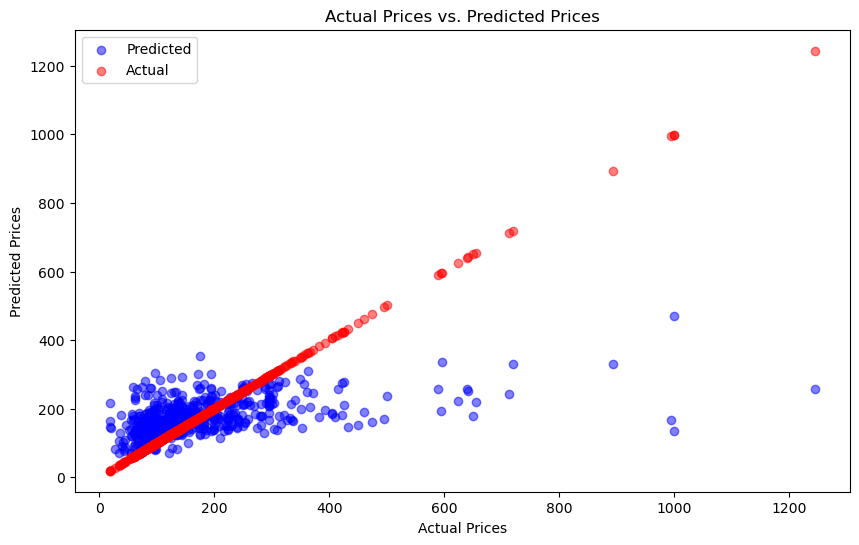

In [113]:
# Create a scatter plot for actual and predicted prices in different colors
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')  # Plotting actual prices on the same plot
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()